# Data Analysis

Data Analysis is important because it provides valuable insights and information that can drive decision-making and problem-solving. By analyzing data, patterns, trends, and correlations can be identified, enabling organizations to make informed decisions and predictions. Data analysis helps businesses understand their customers, optimize processes, identify opportunities, detect anomalies, and measure performance. It also supports evidence-based research and helps uncover relationships and causality between variables. Overall, data analysis empowers organizations to gain a competitive edge, improve efficiency, and make data-driven decisions.

## Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
df=pd.read_csv('data/cleaned_data.csv')

---

## Target variable (Time_taken)
The time taken by the delivery partner to complete the order

In [3]:
df['Time_taken'].describe().to_frame().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time_taken,44900.0,26.3,9.38,10.0,19.0,26.0,32.0,54.0


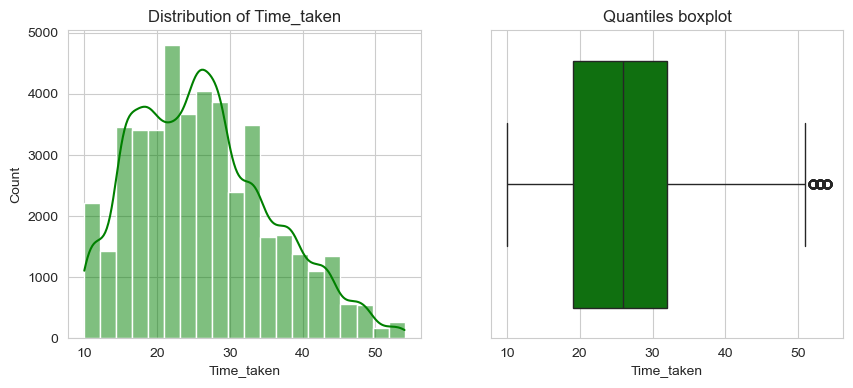

In [4]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=df, x=df['Time_taken'], bins=20, kde=True, color='green', ax=ax1)
ax1.set_title('Distribution of Time_taken')

sns.boxplot(data=df, x='Time_taken', ax=ax2, color='green')
ax2.set_title('Quantiles boxplot');

In [5]:
# Find outliers
q1=np.percentile(df['Time_taken'], 25)
q3=np.percentile(df['Time_taken'], 75)
iqr=q3-q1
df[df['Time_taken']>q3+1.5*iqr].shape[0]

265

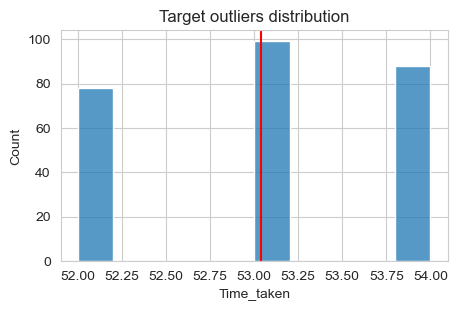

In [6]:
plt.figure(figsize=(5, 3))

sns.histplot(x=df[df['Time_taken']>q3+1.5*iqr]['Time_taken'])
plt.axvline(df[df['Time_taken']>q3+1.5*iqr]['Time_taken'].mean(), color = 'red')
plt.title('Target outliers distribution');

**Insight:**
-  Target is a little right skewed
-  Skewness is cause my be due to outliers that are above the q3+1.5*iqr, meaning, about 52 minutes or more minutes do deliver the order.
-  Average delivery time is 26,3 minutes
-  About 75% of the deliveries were made in 32 minutes or less.
-  Fastest delivery was 10 minutes and the slowest 54 minutes

## Descrete & Continuous Variables

In [7]:
num_col=df.select_dtypes(exclude='object')
num_col.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken', 'pick_time', 'distance'],
      dtype='object')

### Delivery_person_Age

In [8]:
df['Delivery_person_Age'].describe().to_frame().round(2).T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,44900.0,29.55,5.72,20.0,25.0,30.0,35.0,39.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\2409297925.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\2409297925.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


''

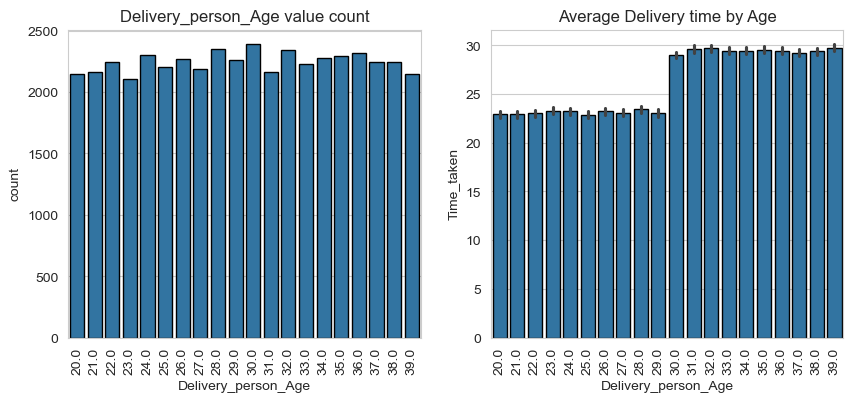

In [9]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10,4))

sns.countplot(data=num_col, x='Delivery_person_Age', ax=ax1, edgecolor='k')
ax1.set_title('Delivery_person_Age value count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(data=df, x='Delivery_person_Age', y='Time_taken', estimator='mean', ax=ax2, edgecolor='k')
ax2.set_title('Average Delivery time by Age')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
;

In [10]:
df['age_group']= df['Delivery_person_Age'].apply(lambda value: 'Younger' if value<30 else 'Older')
df.groupby('age_group')['Time_taken'].mean()

age_group
Older      29.443949
Younger    23.095090
Name: Time_taken, dtype: float64

''

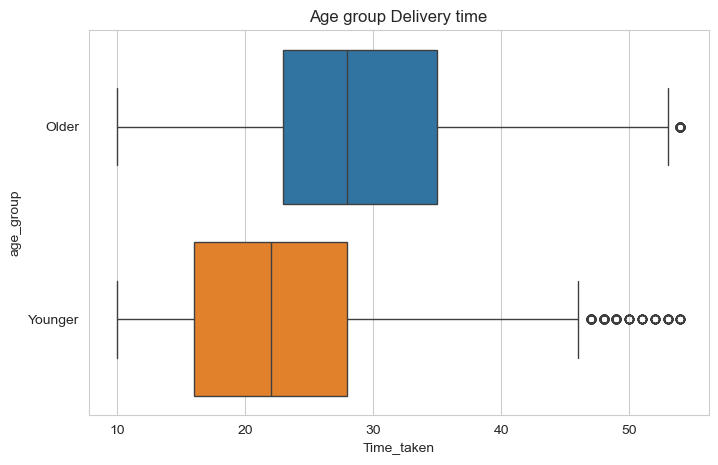

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='age_group', x='Time_taken', hue='age_group')
plt.title('Age group Delivery time')
;

''

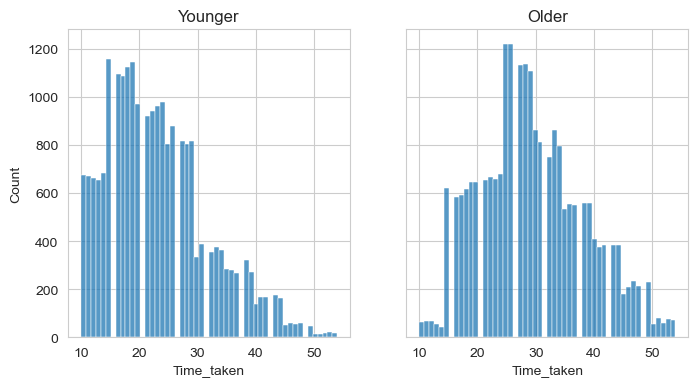

In [12]:
# Distribution of delivery time by age group
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(8,4), sharey=True)
sns.histplot(data=df[df['age_group']=='Younger'], x='Time_taken', ax=ax1)
sns.histplot(data=df[df['age_group']=='Older'], x='Time_taken', ax=ax2)
ax1.set_title('Younger')
ax2.set_title('Older')
;

In [13]:
# Find out some deliveries take more than 30 minutes
def cal_mode(series):
    mode=series.mode()
    if not mode.empty:
        return mode[0]
    else:
        return None

df['time_taken_group']= df['Time_taken'].apply(lambda value: 'Below 30' if value<30 else 'Above 30')
age_stat=df.groupby(['age_group', 'time_taken_group']).agg({'Delivery_person_Ratings':'mean',
                                                    'Weatherconditions':cal_mode,
                                                    'Road_traffic_density':cal_mode,
                                                    'Vehicle_condition':cal_mode,
                                                    'Type_of_vehicle':cal_mode,
                                                    'multiple_deliveries':cal_mode,
                                                    'Time_taken':'mean',
                                                    'distance':'mean'}).T

age_stat

age_group                     Older                 Younger            
time_taken_group           Above 30    Below 30    Above 30    Below 30
Delivery_person_Ratings    4.433062    4.729941    4.477012    4.728563
Weatherconditions            Cloudy       Sunny         Fog  Sandstorms
Road_traffic_density            Jam         Low         Jam         Low
Vehicle_condition                 0           1           0           2
Type_of_vehicle          motorcycle  motorcycle  motorcycle  motorcycle
multiple_deliveries             2.0         2.0         2.0         2.0
Time_taken                37.516487   22.846327   36.787803   19.707812
distance                   11.68125    8.171265   12.740316    8.977138

In [14]:
del age_stat
df=df.drop(['age_group', 'time_taken_group'], axis = 1)

**Notes:**
-  Since people older than 30 have higher delivery times (therefore people younger than 30 have lower delivery times) it might be a good idea to split Delivery_person_Age into two groups: Younger (Delivery_person_Age < 30) and Older (Delivery_person_Age >= 30).

**Insight:**
-  There is no distribution in Delivery_person_Age, each age has around 2000 people that delivering. 
-  The Age ranges between 20 and 39.
-  Average deliver times are higher in Delivery_person older than 30, this means that even when age has no distribution, we still see a very clear difference in average delivery time between the two age groups.
-  Mean delivery time of those Delivery_person younger than 30 is 23 minutes, while those Delivery_person older than 30 is about 29 minutes. 
-  Younger than 30 Delivery_person has a lot of outliers in the delivery time, while Older than 30 Delivery_person barely has outliers. This indicate me that high delivery times in Older than 30 Delivery_person is quite usual.
-  Most Younger have a delivery time of less than 30 minutes, while Older have a time of about 25 to 30 minutes.
-  The large difference in delivery times among the younger group is largely due to the fact that those delivering over 30 minutes are mostly travelling in traffic jam, which slows down delivery times more than usual. Furthermore, the delivery distance also contributes to the difference.
-  Besides Weatherconditions, Vehicle_condition, data statistics look very similar across other variables.

### Delivery_person_Ratings	

In [15]:
df['Delivery_person_Ratings'].describe().to_frame().round(2).T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Ratings,44900.0,4.64,0.31,2.5,4.5,4.7,4.8,5.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\548586362.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\548586362.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


''

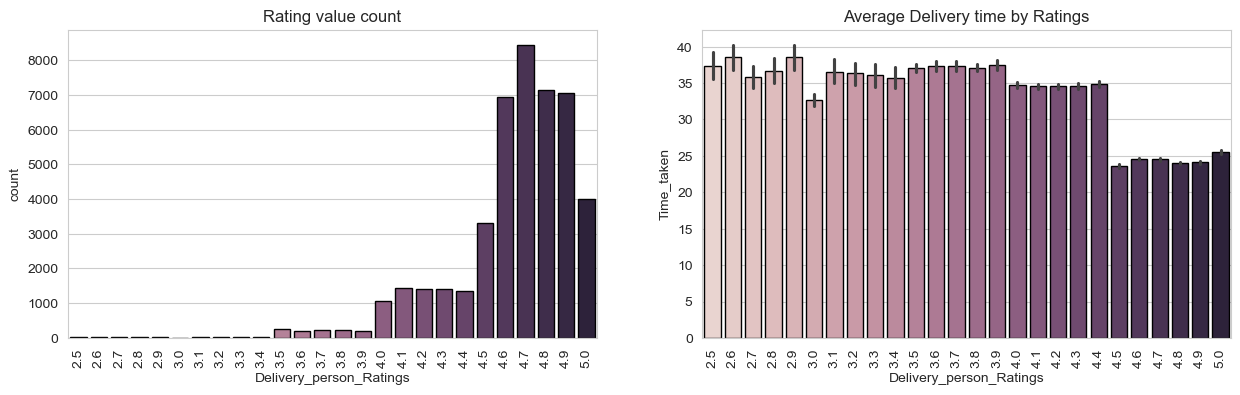

In [16]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(15,4))

sns.countplot(data=num_col, x='Delivery_person_Ratings', ax=ax1, edgecolor='k', hue='Delivery_person_Ratings', legend=False)
ax1.set_title('Rating value count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(data=df, x='Delivery_person_Ratings', y='Time_taken', hue='Delivery_person_Ratings', estimator='mean', ax=ax2, edgecolor='k', legend=False)
ax2.set_title('Average Delivery time by Ratings')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
;

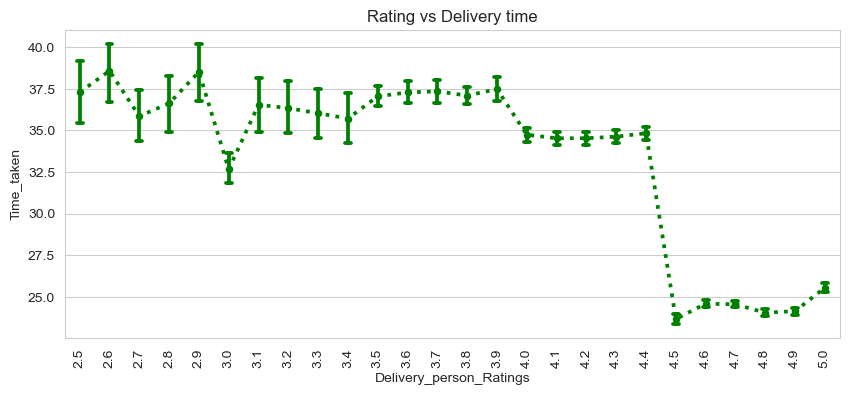

In [17]:
plt.figure(figsize=(10, 4))

sns.pointplot(data=df, x='Delivery_person_Ratings', y='Time_taken', capsize=.2,
              linestyles=':', markers='.', color='green')

plt.xticks(rotation=90)
plt.title('Rating vs Delivery time');

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\3050830336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Delivery_person_Ratings', y='Time_taken', palette='viridis')


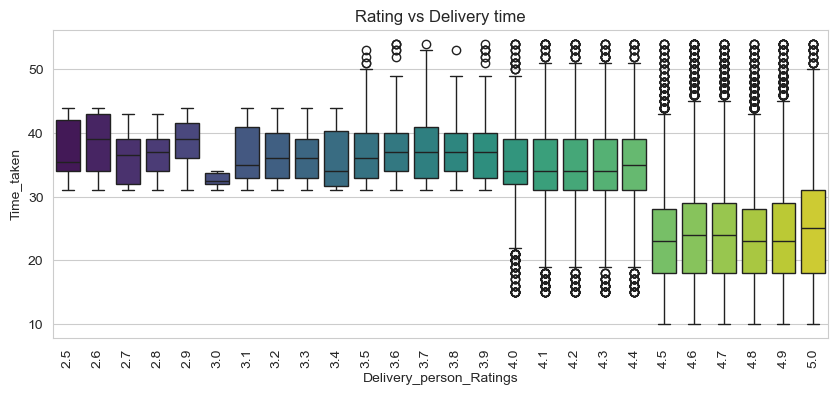

In [18]:
plt.figure(figsize=(10 , 4))

sns.boxplot(data=df, x='Delivery_person_Ratings', y='Time_taken', palette='viridis')
# sns.stripplot(data = data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', color = 'k', alpha = 0.01)


plt.xticks(rotation=90)
plt.title('Rating vs Delivery time');

In [19]:
df['rating_group']=df['Delivery_person_Ratings'].apply(lambda value: 'Below 4.5' if value<4.5 else 'Above 4.5')
df.groupby('rating_group')['Time_taken'].mean()

rating_group
Above 4.5    24.392315
Below 4.5    35.061191
Name: Time_taken, dtype: float64

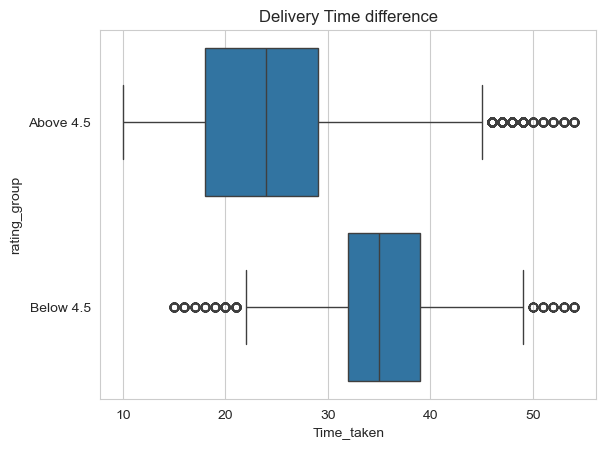

In [20]:
sns.boxplot(data=df, y='rating_group', x='Time_taken')

plt.title('Delivery Time difference');

''

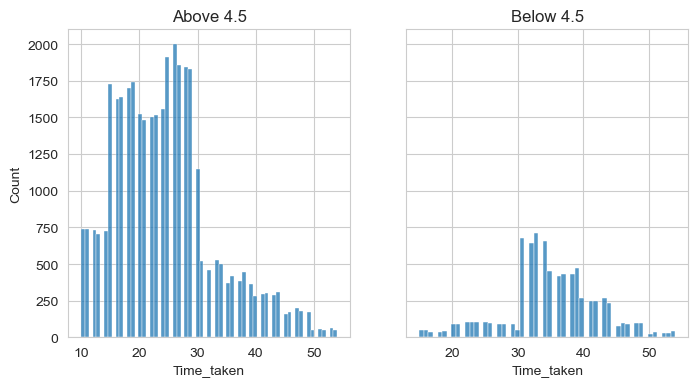

In [21]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(8,4), sharey=True)
sns.histplot(data=df[df['rating_group']=='Above 4.5'], x='Time_taken', ax=ax1)
sns.histplot(data=df[df['rating_group']=='Below 4.5'], x='Time_taken', ax=ax2)
ax1.set_title('Above 4.5')
ax2.set_title('Below 4.5')
;

In [22]:
df['time_taken_group']=df['Time_taken'].apply(lambda value: 'Below 30' if value<40 else 'Above 30')
rating_stat=df.groupby(['rating_group', 'time_taken_group']).agg({'Delivery_person_Age':'mean',
                                                    'Weatherconditions':cal_mode,
                                                    'Road_traffic_density':cal_mode,
                                                    'Vehicle_condition':cal_mode,
                                                    'Type_of_vehicle':cal_mode,
                                                    'multiple_deliveries':cal_mode,
                                                    'Time_taken':'mean',
                                                    'distance':'mean'}).T

rating_stat

rating_group           Above 4.5               Below 4.5            
time_taken_group        Above 30    Below 30    Above 30    Below 30
Delivery_person_Age    31.859422   28.921738   32.030639   31.330778
Weatherconditions            Fog       Sunny      Cloudy      Stormy
Road_traffic_density         Jam         Low         Jam         Jam
Vehicle_condition              0           1           0           0
Type_of_vehicle       motorcycle  motorcycle  motorcycle  motorcycle
multiple_deliveries          2.0         2.0         2.0         2.0
Time_taken             44.739742   22.828408   44.076598   32.277606
distance               14.007201     9.16234   13.131774   10.063543

In [23]:
del rating_stat
df=df.drop(['rating_group', 'time_taken_group'], axis = 1)

**Important finds:**
-  Most of the drivers are people with 4.0+ rating.
-  Rating ranges between 2.5 and 5.0, and mean rating is 4.6
-  The higher the rating, the faster the delivery.
-  Delivey_person with rating below 4.5 have an average delivery time of 35 minutes, while those with higher rating than 4.5 have around 24 minutes.
-  The group above 4.5 usually delivers under 30 minutes, while the group below 4.5 mostly delivers over 30 minutes. Distance and Weatherconditions and Road_traffic_density are the major factors that influence this difference.

**Notes:**
-  It is obvius that people with less rating have higher delivery times, but since is barely no delivery_person with this low rates, the person rating may not impact as much as I am thinking the model performace.

### Vehicle_condition
Condition of the vehicle

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\3780897954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='Vehicle_condition', palette = 'summer')


''

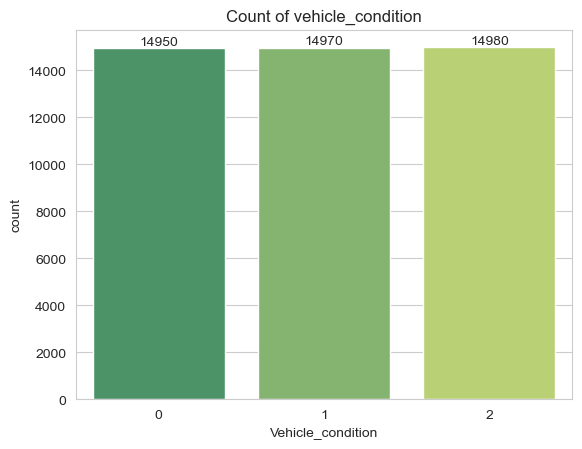

In [24]:
ax=sns.countplot(data=df, x='Vehicle_condition', palette = 'summer')
plt.title('Count of vehicle_condition')
for i in ax.containers:
    ax.bar_label(i,)
;

In [25]:
df.groupby('Vehicle_condition')['Time_taken'].mean()

Vehicle_condition
0    30.070234
1    24.368337
2    24.464486
Name: Time_taken, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8660\643011839.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Time_taken', x='Vehicle_condition', palette = 'Pastel1', width=0.5)


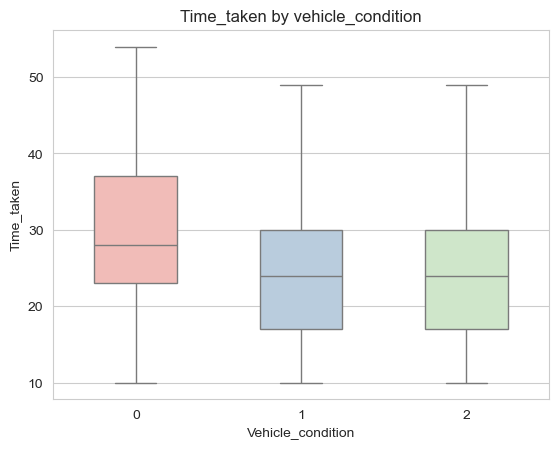

In [26]:
sns.boxplot(data=df, y='Time_taken', x='Vehicle_condition', palette = 'Pastel1', width=0.5)
plt.title('Time_taken by vehicle_condition');

In [27]:
condition_stat=df.groupby(['Vehicle_condition']).agg({'Delivery_person_Age':'mean',
                                                    'Weatherconditions':cal_mode,
                                                    'Road_traffic_density':cal_mode,
                                                    'Type_of_vehicle':cal_mode,
                                                    'multiple_deliveries':cal_mode,
                                                    'Time_taken':'mean',
                                                    'distance':'mean'}).T

condition_stat

Vehicle_condition,0,1,2
Delivery_person_Age,29.565753,29.553173,29.542991
Weatherconditions,Sandstorms,Fog,Stormy
Road_traffic_density,Low,Low,Low
Type_of_vehicle,motorcycle,motorcycle,scooter
multiple_deliveries,2.0,2.0,2.0
Time_taken,30.070234,24.368337,24.464486
distance,9.703323,9.691174,9.815661


''

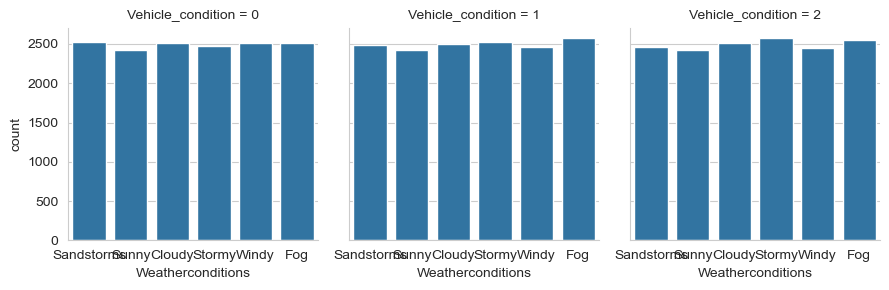

In [28]:
sns.FacetGrid(data=df, col='Vehicle_condition').map_dataframe(sns.countplot, x='Weatherconditions')
;

''

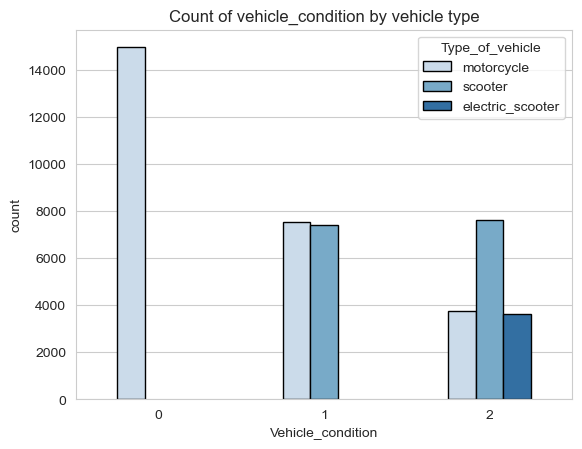

In [29]:
sns.countplot(data=df, x='Vehicle_condition', hue='Type_of_vehicle', palette='Blues', edgecolor = 'k', width=0.5)
plt.title('Count of vehicle_condition by vehicle type')
;

In [30]:
del condition_stat

**Important finds:**
-  Condition of the vehicle are balanced, all 3 conditions have around 14k obsevations.
-  Data statistics look pretty much the same through all the conditions.
-  All of 0 vehicle condition are motorcycles and there is only 2 vehicle_condition electric_scooter.

**Notes:**
-   From the EDA I don't think vehicle_condition has that much impact in the target, but it might help another feature predict the target.

### Distance
Delivery distance

''

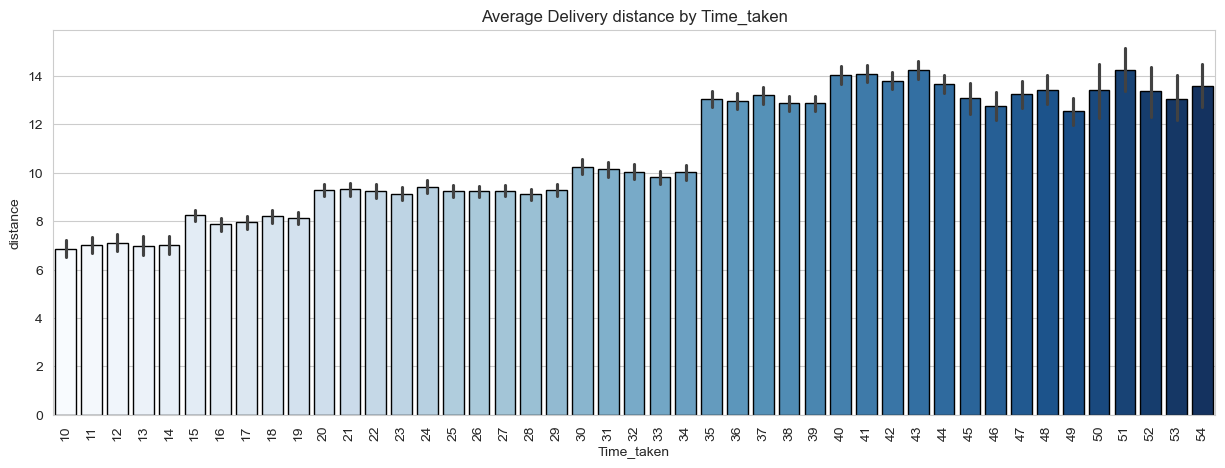

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, y='distance', x='Time_taken', hue='Time_taken', palette='Blues', edgecolor='k', legend=False)
plt.title('Average Delivery distance by Time_taken')
plt.xticks(rotation=90)
;

''

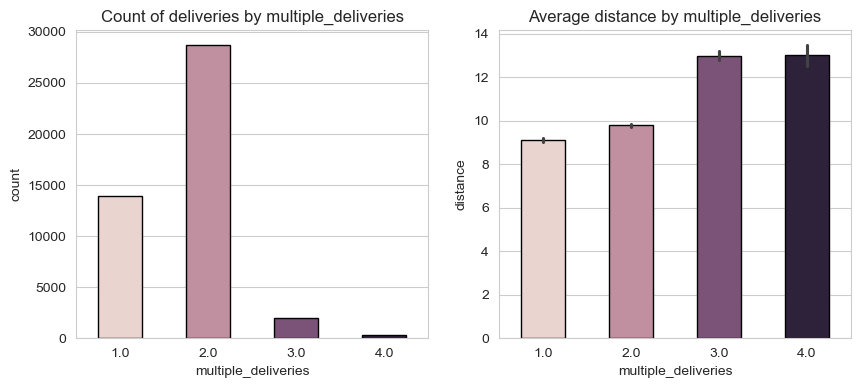

In [32]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data=df, x='multiple_deliveries', hue='multiple_deliveries', legend=False, edgecolor = 'k', width=0.5, ax=ax1)
sns.barplot(data=df, x='multiple_deliveries', y='distance', hue='multiple_deliveries', edgecolor='k', width=0.5, estimator='mean', legend=False, ax=ax2)
ax1.set_title('Count of deliveries by multiple_deliveries')
ax2.set_title('Average distance by multiple_deliveries')
;

''

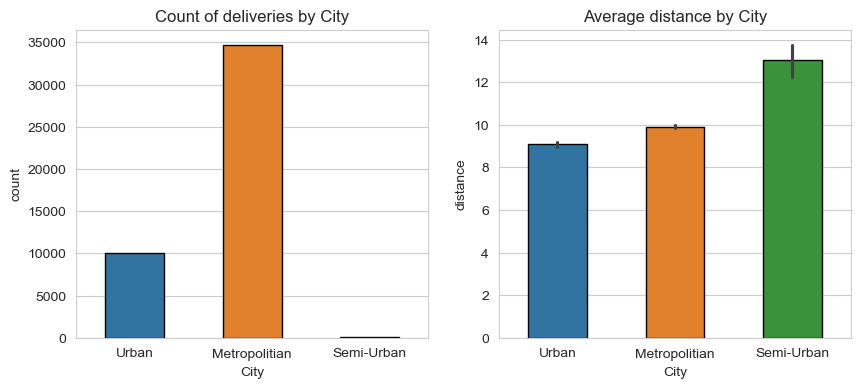

In [33]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data=df, x='City', hue='City', legend=False, edgecolor = 'k', width=0.5, ax=ax1)
sns.barplot(data=df, x='City', y='distance', hue='City', edgecolor='k', width=0.5, estimator='mean', legend=False, ax=ax2)
ax1.set_title('Count of deliveries by City')
ax2.set_title('Average distance by City')
;

**Important finds:**
-  Obviously we see that the distance is proportional to the delivery time, the greater the distance, the longer the delivery time.
- Delivery distance is related to multiple_deliveries and City. For multiple_deliveries, although 2 simultaneous orders make up the majority, most of them are quite close together, resulting in an average distance of just under 10km, whereas with 4 simultaneous orders, the average distance is higher (around 13km).
- Deliveries in semi-urban are often further than in urban and metropolitian

## multiple_deliveries
Total deliveries that a person picked

In [34]:
df['multiple_deliveries'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
multiple_deliveries,44900.0,1.750156,0.567328,1.0,1.0,2.0,2.0,4.0


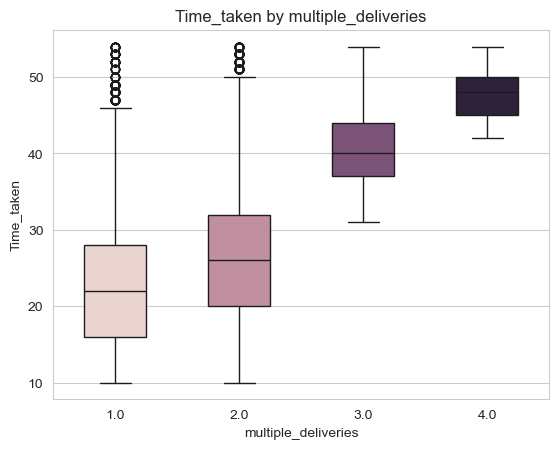

In [35]:
sns.boxplot(data=df, y='Time_taken', x='multiple_deliveries', width=0.5, hue='multiple_deliveries', legend=False)
plt.title('Time_taken by multiple_deliveries');

In [36]:
df.groupby('multiple_deliveries')['Time_taken'].mean()

multiple_deliveries
1.0    22.877683
2.0    26.723109
3.0    40.462679
4.0    47.802260
Name: Time_taken, dtype: float64

''

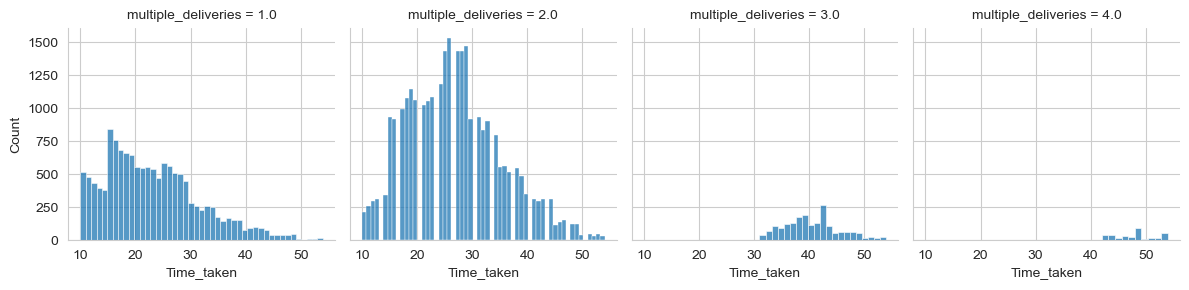

In [37]:
sns.FacetGrid(data=df, col='multiple_deliveries').map_dataframe(sns.histplot, x='Time_taken')
;

**Important finds:**
-  Most of the delivery_person were carrying one or two orders
-  There is a linear relationship between the multiple_deliveries and all the delivery possible scenarios, where, the more deliveries the higher the amount of multiple_deliveries, the higher the time_taken/distance.
-  In average the more multiple_deliveries the more Distance/Time_taken the delivery_person has to travel.
-  Up to 2 multiple_deliveries is the peak for distance traveled

**Notes:**
-   Multiple_deliveries has a lot of correlations with the data, it would be good to explore some engineering methods to take more information out of this feature.

### Picked Time
Time that a person picked order and start delivery

In [38]:
df['pick_time']=df['pick_time'].apply(lambda value: 24 if value==0 else value)

''

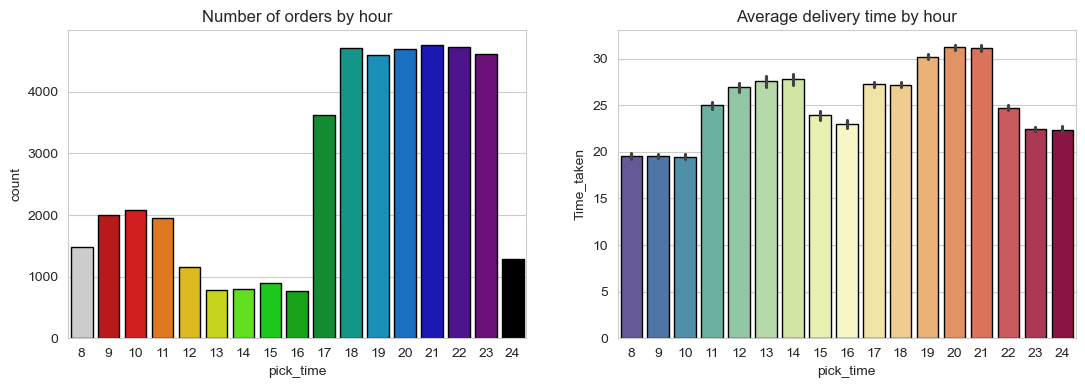

In [39]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(13, 4))
sns.countplot(data=df, x='pick_time', ax=ax1, palette='nipy_spectral_r', edgecolor='k', hue='pick_time', legend=False)
sns.barplot(data=df, x='pick_time', y='Time_taken', ax=ax2, palette='Spectral_r', edgecolor = 'k', hue='pick_time', legend=False)
ax1.set_title('Number of orders by hour')
ax2.set_title('Average delivery time by hour')
;

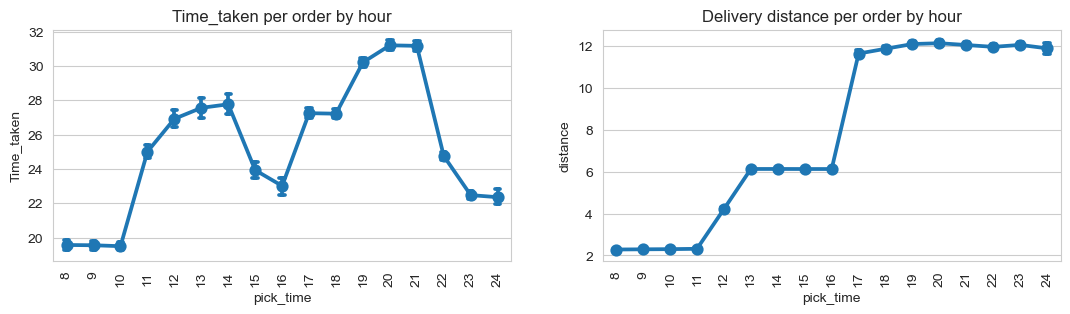

In [40]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(13, 3))

sns.pointplot(data=df, x='pick_time', y='Time_taken', ax=ax1, capsize=.2)
ax1.set_title('Time_taken per order by hour')
sns.pointplot(data=df, x='pick_time', y='distance', ax=ax2, capsize=.2)
ax2.set_title('Delivery distance per order by hour')

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

''

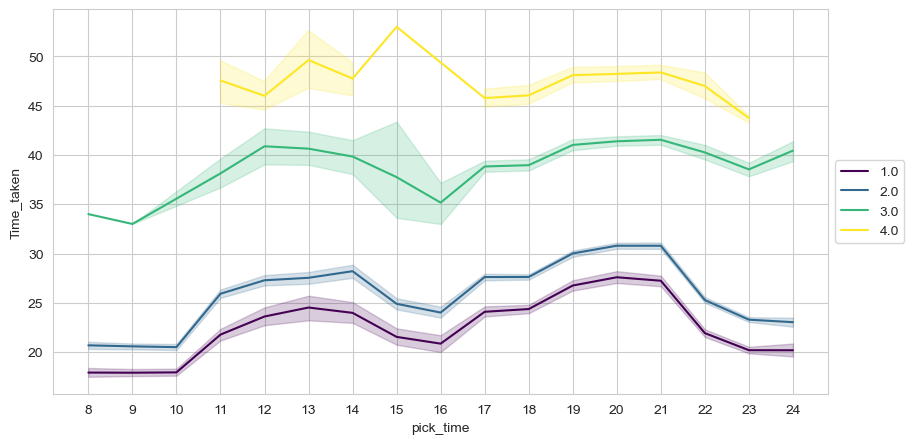

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='pick_time', y='Time_taken', hue='multiple_deliveries', palette='viridis')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(np.arange(8, 25))
;

**Important finds:**
-  Most people order in the evening (from 5pm onwards)
-  Early and late night orders take less time to be delivered and the remaining time takes longer. This may be related to the ordering habits of the people as the time from 11am to 2pm and from 5pm to 9pm is the time when they have lunch and dinner, so the demand for orders is high, in addition, it is also the time when people go out to buy lunch or go home from work, leading to worse traffic conditions, thereby increasing the overall delivery time.

## Binary & Categorical Features

In [42]:
cat_cols=df.select_dtypes(include='object')
cat_cols.columns

Index(['ID', 'Delivery_person_ID', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

### Weatherconditions

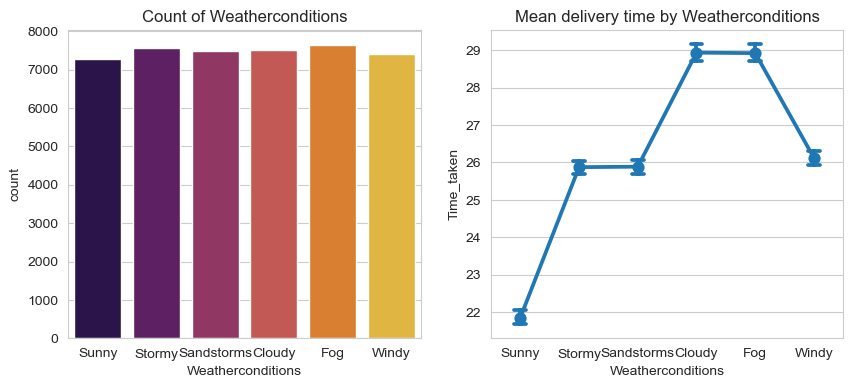

In [43]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=df, x='Weatherconditions', palette='inferno', ax=ax1, hue='Weatherconditions', legend=False)
ax1.set_title('Count of Weatherconditions')
sns.pointplot(data=df, x='Weatherconditions', y='Time_taken', capsize=.2)
ax2.set_title('Mean delivery time by Weatherconditions');

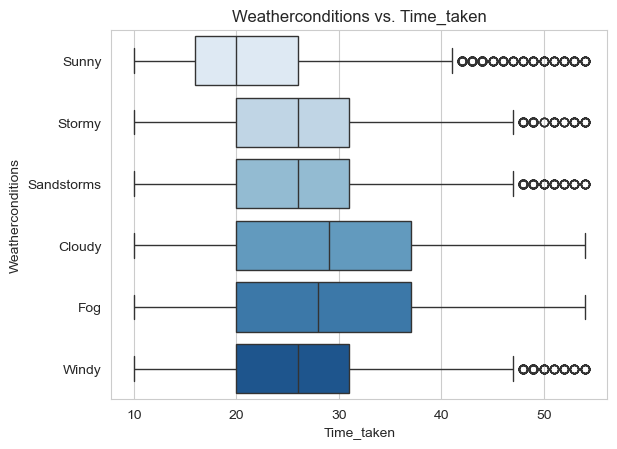

In [44]:
sns.boxplot(data=df, y='Weatherconditions', x='Time_taken', palette='Blues', hue='Weatherconditions', legend=False)
plt.title('Weatherconditions vs. Time_taken');

In [45]:
weather_stat=df.groupby(['Weatherconditions']).agg({'Delivery_person_Age':'mean',
                                                    'Road_traffic_density':cal_mode,
                                                    'Type_of_vehicle':cal_mode,
                                                    'multiple_deliveries':cal_mode,
                                                    'Time_taken':'mean',
                                                    'distance':'mean'}).T

weather_stat

Weatherconditions,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
Delivery_person_Age,29.594124,29.427842,29.542976,29.619142,29.630246,29.512952
Road_traffic_density,Low,Low,Low,Low,Low,Low
Type_of_vehicle,motorcycle,motorcycle,motorcycle,motorcycle,motorcycle,motorcycle
multiple_deliveries,2.0,2.0,2.0,2.0,2.0,2.0
Time_taken,28.931933,28.918488,25.887983,25.875512,21.862529,26.122774
distance,9.802619,9.76103,9.692693,9.751693,9.624175,9.784446


In [46]:
del weather_stat

**Important finds:**
-  Weatherconditions value counts are equal, all the conditions have around 7000 observations.
-  When condition is Sunny deliveries are the fastest
-  In average when conditions are Stormy or Sandstorms and Fog or Cloudy the deliveries take the same time.
-  When condition is cloudy or Fog deliveries take the longer, in average 30minutes.
-  There is almost no difference between the weather conditions except for delivery time.

**Notes:**
-   Condition is in fact important for the prediction of delivery time, but it is not as important as I expected to be.

### Road_traffic_density
Density of the traffic

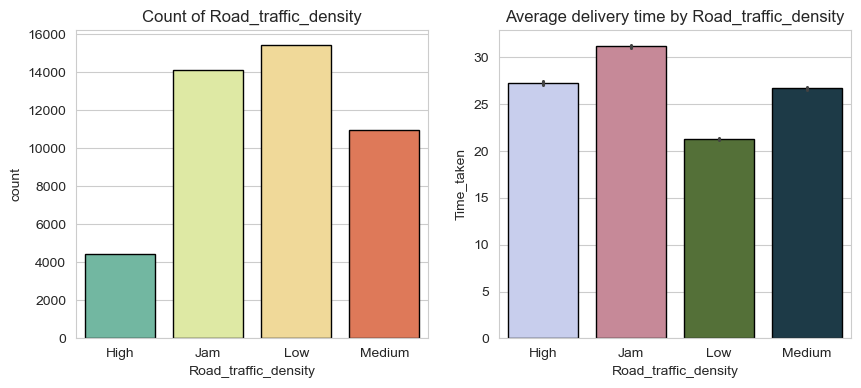

In [47]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=df, x='Road_traffic_density', palette='Spectral_r', ax=ax1, edgecolor='k', hue='Road_traffic_density', legend=False)
ax1.set_title('Count of Road_traffic_density')
sns.barplot(data=df, x='Road_traffic_density', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='Road_traffic_density', legend=False)
ax2.set_title('Average delivery time by Road_traffic_density');

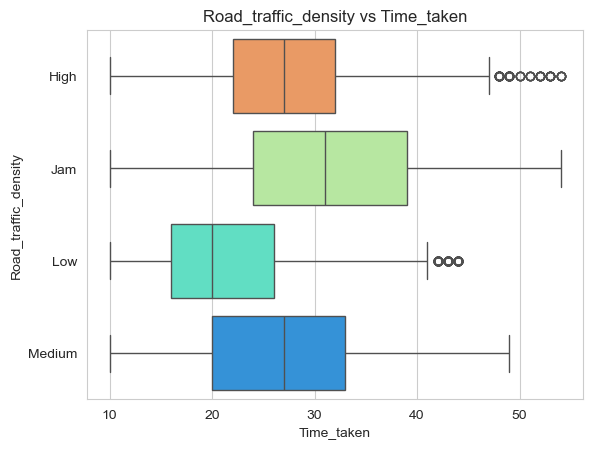

In [48]:
sns.boxplot(data=df, y='Road_traffic_density', x='Time_taken', palette='rainbow_r', hue='Road_traffic_density', legend=False)
plt.title('Road_traffic_density vs Time_taken');

In [49]:
density_stat=df.groupby(['Road_traffic_density']).agg({'Delivery_person_Age':'mean',
                                                    'Weatherconditions':cal_mode,
                                                    'Type_of_vehicle':cal_mode,
                                                    'multiple_deliveries':cal_mode,
                                                    'Time_taken':'mean',
                                                    'distance':'mean'}).T

density_stat

Road_traffic_density,High,Jam,Low,Medium
Delivery_person_Age,29.612947,29.561057,29.55382,29.521174
Weatherconditions,Fog,Fog,Stormy,Fog
Type_of_vehicle,motorcycle,motorcycle,motorcycle,motorcycle
multiple_deliveries,2.0,2.0,2.0,2.0
Time_taken,27.246718,31.182391,21.273022,26.703467
distance,4.408174,12.06556,8.178447,11.082197


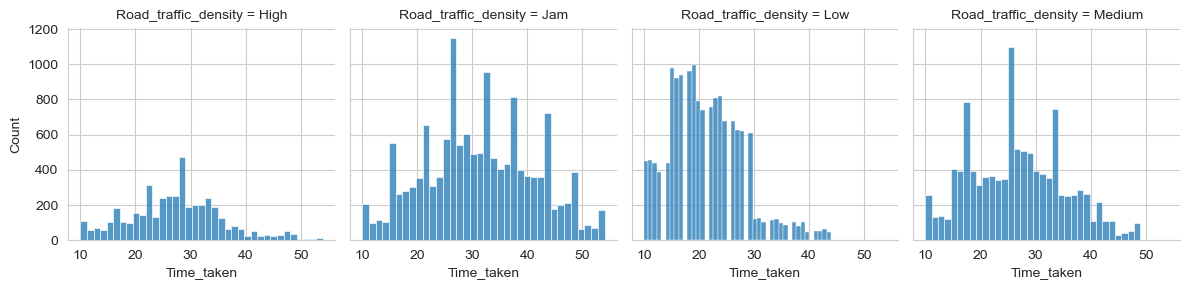

In [50]:
sns.FacetGrid(data=df, col='Road_traffic_density').map_dataframe(sns.histplot, x='Time_taken');

In [51]:
del density_stat

**Important finds:**
-  Most of the times road traffic were Jam or Low,.
-  Delivery times are lower when trafic is low and higher when traffic is Jam.
-  High and Medium traffic also has a high delivery mean time.
-  Mean delivery distance when road is Jam is 12 km and when is Low is about 8.2
-  Delivery times in Road_traffic_density are High, Jam and Medium which are fairly evenly distributed, while most orders in Low are just under 30 minutes, orders above 30 minutes are probably related to some other factors which could be multiple_deliveries or Weatherconditions

**Notes:**
-   Traffic does impact the delivery time in a really crucial way, and it is important to be consider in order to train a model

## Type_of_order
The type of meal ordered by the customer

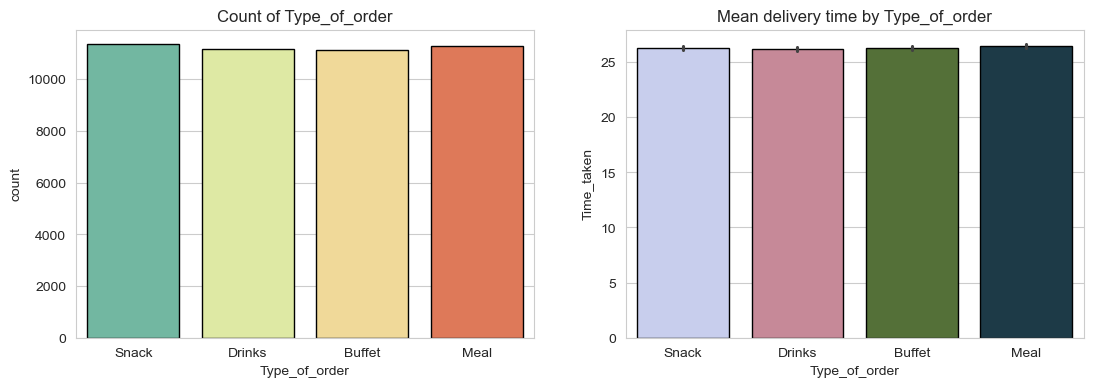

In [52]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize = (13, 4))

sns.countplot(data=df, x='Type_of_order', palette='Spectral_r', ax=ax1, edgecolor='k', hue='Type_of_order', legend=False)
ax1.set_title('Count of Type_of_order')
sns.barplot(data=df, x='Type_of_order', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='Type_of_order', legend=False)
ax2.set_title('Mean delivery time by Type_of_order');

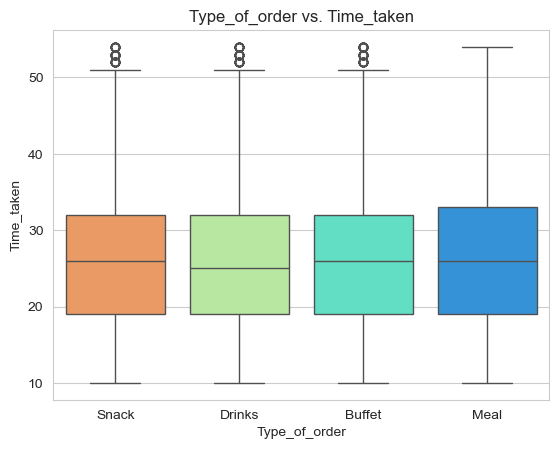

In [53]:
sns.boxplot(data=df, x='Type_of_order', y='Time_taken', palette='rainbow_r', hue='Type_of_order')
plt.title('Type_of_order vs. Time_taken');

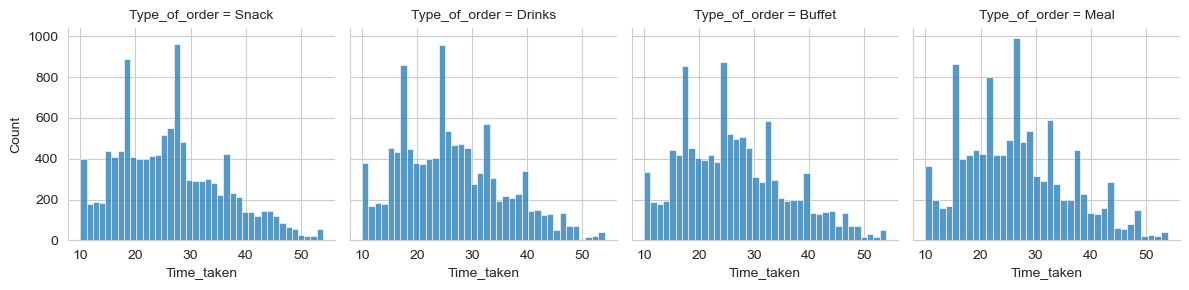

In [54]:
sns.FacetGrid(data=df, col='Type_of_order').map_dataframe(sns.histplot, x='Time_taken');

**Important finds:**
-  The dataset consists of equal amounts of different orders, about 10k of each type_of_order
-  There is no difference in the delivery time by type_of_order.
-  Statistics are pretty much the same across all the types of order.

**Notes:**
-   Type of order doesnt really have to do with the time taken to delivery.

## Type_of_vehicle

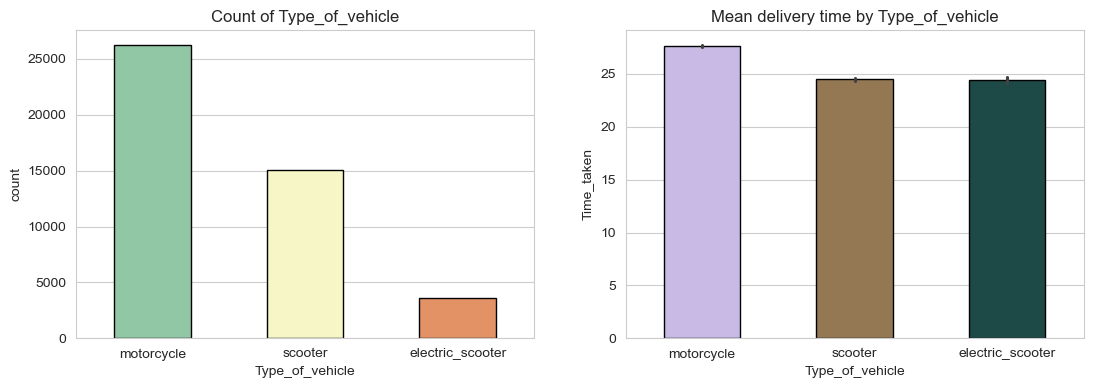

In [55]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize = (13, 4))

sns.countplot(data=df, x='Type_of_vehicle', palette='Spectral_r', ax=ax1, edgecolor='k', hue='Type_of_vehicle', width=0.5)
ax1.set_title('Count of Type_of_vehicle')
sns.barplot(data=df, x='Type_of_vehicle', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='Type_of_vehicle', width=0.5)
ax2.set_title('Mean delivery time by Type_of_vehicle');

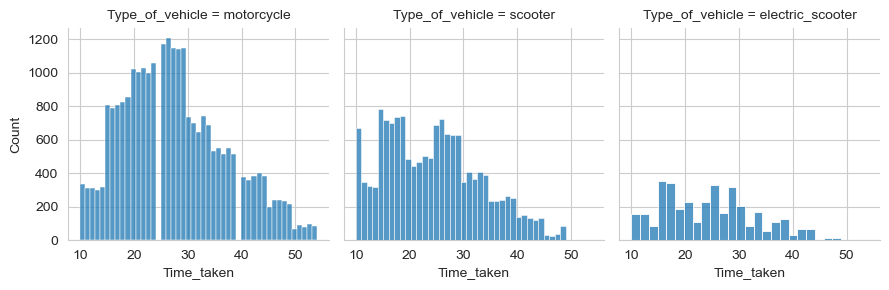

In [56]:
sns.FacetGrid(data=df, col='Type_of_vehicle').map_dataframe(sns.histplot, x='Time_taken');

''

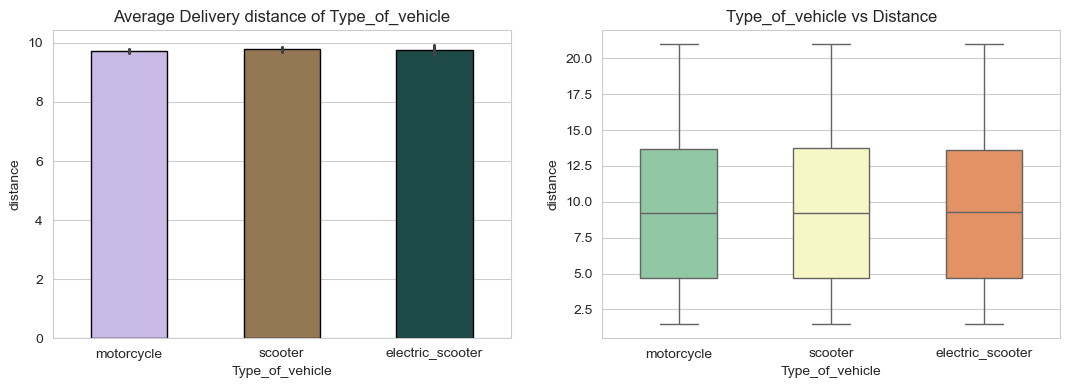

In [57]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(13,4))
sns.barplot(data=df, x='Type_of_vehicle', y='distance', palette='cubehelix_r', edgecolor='k', hue='Type_of_vehicle', width=0.5, ax=ax1)
sns.boxplot(data=df, x='Type_of_vehicle', y='distance', palette='Spectral_r', hue='Type_of_vehicle', width=0.5, ax=ax2)
ax1.set_title('Average Delivery distance of Type_of_vehicle')
ax2.set_title('Type_of_vehicle vs Distance')
;

In [58]:
df['Type_of_vehicle']=df['Type_of_vehicle'].apply(lambda value: 'scooter' if value=='electric_scooter' else value)

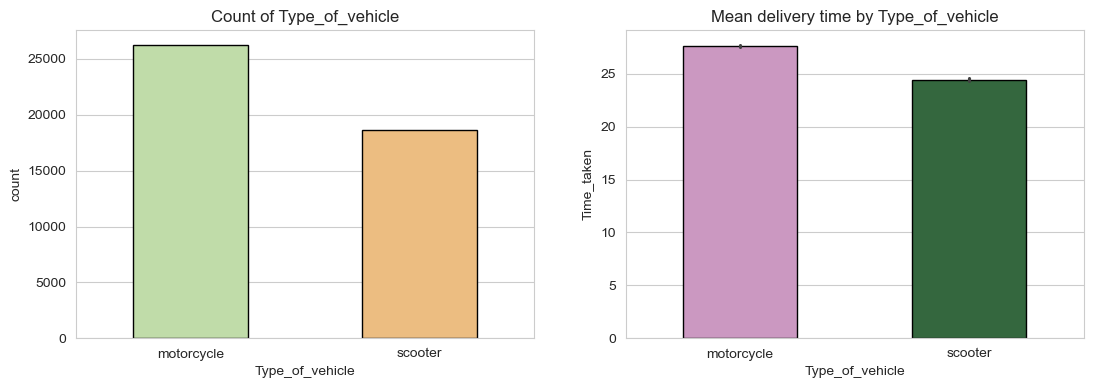

In [59]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize = (13, 4))

sns.countplot(data=df, x='Type_of_vehicle', palette='Spectral_r', ax=ax1, edgecolor='k', hue='Type_of_vehicle', width=0.5)
ax1.set_title('Count of Type_of_vehicle')
sns.barplot(data=df, x='Type_of_vehicle', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='Type_of_vehicle', width=0.5)
ax2.set_title('Mean delivery time by Type_of_vehicle');

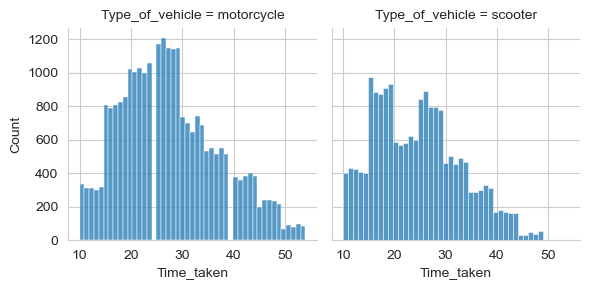

In [60]:
sns.FacetGrid(data=df, col='Type_of_vehicle').map_dataframe(sns.histplot, x='Time_taken');

**Important finds:**
-  Most of the vehicles in the data are motorcycles.
-  Scooter max distance is 40km, Electric scooter max distance is around 35km and motorcycle max distance goes as high as 70km.
-  There is no preference in the type of vehicle by order

**Notes:**
-   Scooter and Electric Scooter have the same statistics so I joined them together.

## Festival
If there was a Festival or no.

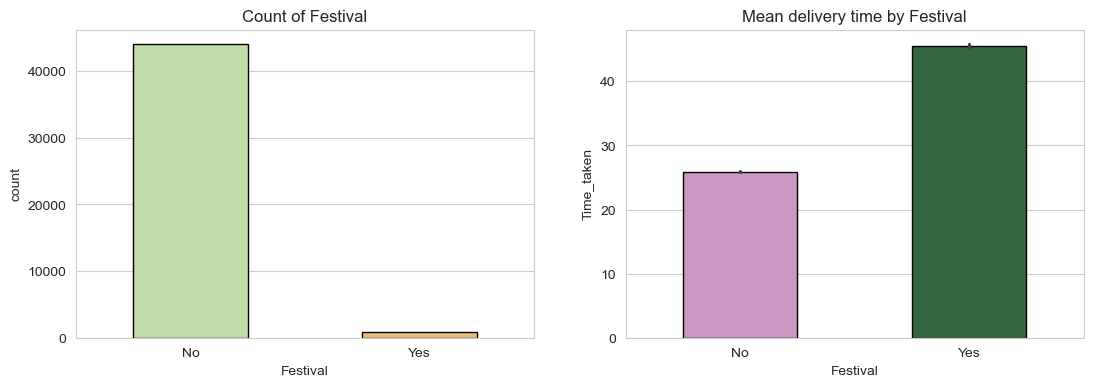

In [61]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(13, 4))

sns.countplot(data=df, x='Festival', palette='Spectral_r', ax=ax1, edgecolor='k', hue='Festival', legend=False, width=0.5)
ax1.set_title('Count of Festival')
sns.barplot(data=df, x='Festival', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='Festival', legend=False, width=0.5)
ax2.set_title('Mean delivery time by Festival');

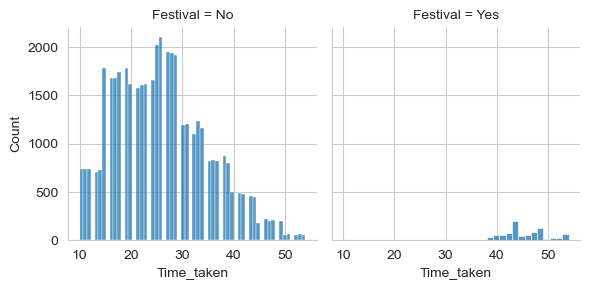

In [62]:
sns.FacetGrid(data=df, col='Festival').map_dataframe(sns.histplot, x='Time_taken');

''

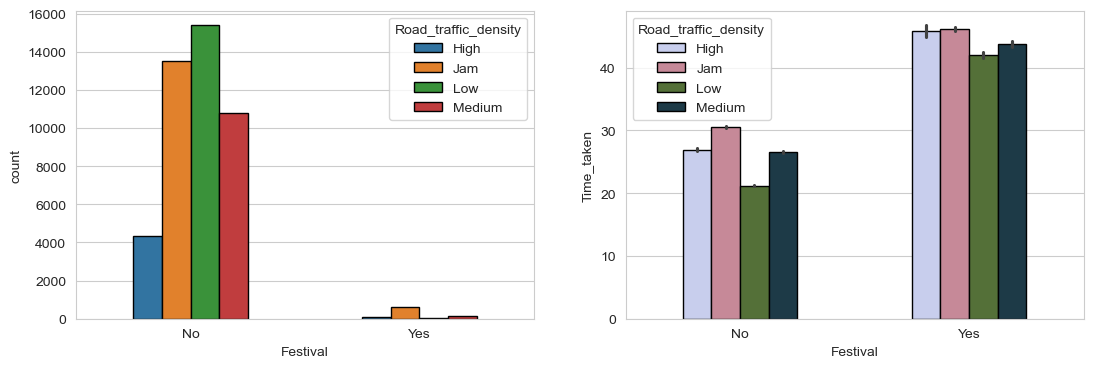

In [63]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(13, 4))
sns.countplot(data=df, x='Festival', hue='Road_traffic_density', edgecolor='k', width=0.5, ax=ax1)
sns.barplot(data=df, x='Festival', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='Road_traffic_density', width=0.5)
;

**Important finds:**
-  Festival is so unbalanced, since not all the days of the year are gonna be Festival, but whenever there is a Festival delivery time is higher.
-  Lower delivery time when there is a Festival is more than 40 min.
-  When it's a festival, the traffic is mostly Jam, yet the average delivery time is high regardless of traffic density.

## City
Type of city

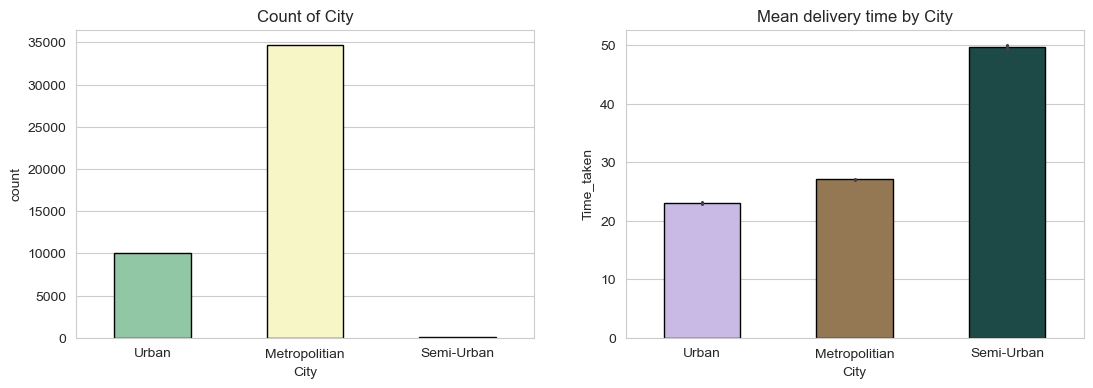

In [64]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(13, 4))

sns.countplot(data=df, x='City', palette='Spectral_r', ax=ax1, edgecolor='k', hue='City', legend=False, width=0.5)
ax1.set_title('Count of City')
sns.barplot(data=df, x='City', y='Time_taken', palette='cubehelix_r', ax=ax2, edgecolor='k', hue='City', legend=False, width=0.5)
ax2.set_title('Mean delivery time by City');

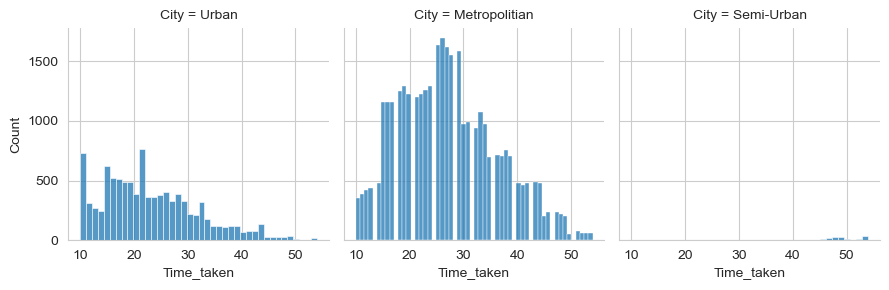

In [65]:
sns.FacetGrid(data=df, col='City').map_dataframe(sns.histplot, x='Time_taken');

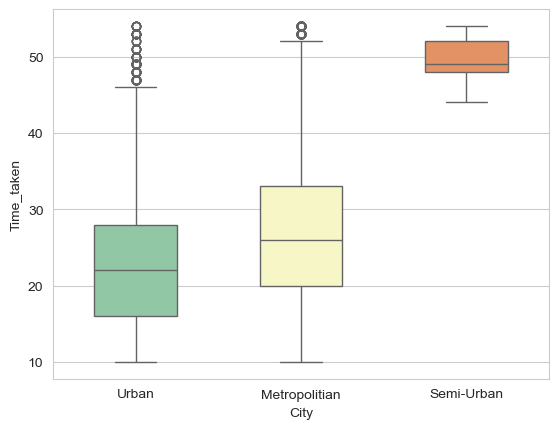

In [66]:
sns.boxplot(data=df, x='City', y='Time_taken', hue='City', palette='Spectral_r', legend=False, width=0.5);

**Important finds:**
-   Most of the deliveries of the sample were made in a Metropolitian CIty.
-  Those deliveries make in a Semi-Urban city took in average about 50 minutes.
-  Semi-urban orders usually take over 45 minutes.

**Notes:**
-   Delivery times in different cities really tells me how important it is to predict the time correctly.

## Modeling data

In [67]:
df=df.drop(['ID','Delivery_person_ID'], axis = 1)

In [68]:
df.to_csv('data/modeling_data.csv', index = False, encoding = 'utf-8')